# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
# Your code here. 
studentID = [1,2,3,4,5,6,7,8,9,10]
age = [17,51,27,21,36,48,19,26,54,30]
tardies = [10,1,5,9,4,2,9,6,0,3]
student_data = pd.DataFrame({"studentID": studentID,"age": age, "tardies": tardies})
student_data

,studentID,age,tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

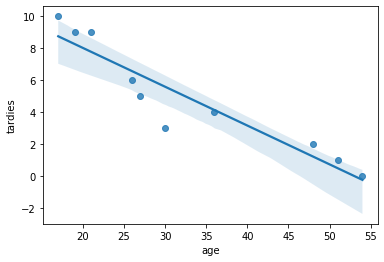

In [3]:
# Your code here.
sns.regplot(x = "age", y = "tardies", data = student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
"""
It seems that the younger the students, the more tardies.
"""

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Calculate covariance
student_data.cov()

,studentID,age,tardies
studentID,9.166667,7.722222,-3.722222
age,7.722222,187.655556,-45.566667
tardies,-3.722222,-45.566667,12.544444


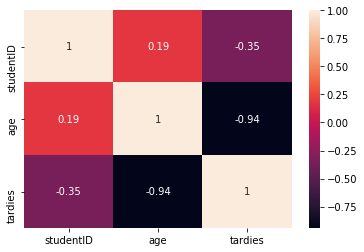

In [5]:
# Calculate correlation
sns.heatmap(student_data.corr(), annot = True)

In [ ]:
"""
The difference between the covariance and the correlation is that the correlation is a standardized value.
This makes comparisons easier with other data sets.
The coveriance is the absolute difference between two points in a data set. 
So when age goes up, the tardies go down.

"""

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# First create the model
model = LinearRegression()

# Then, fit the model
model.fit(student_data["age"].values.reshape(-1,1),
          student_data["tardies"].values.reshape(-1,1))

# Now use the data
intercept = model.intercept_
slope = model.coef_
print("The intercept is:",intercept[0])
print("The slope is:",slope[0][0])

The intercept is: 12.888803363135771
The slope is: -0.2428207709159809


Plot your regression model on your scatter plot.

In [ ]:
"""
The outcome variable is the number of tardies. The independent variable is the age.
I'm using a Linear Regression because we are investigating 2 variables
"""

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [7]:
# Check if the regression line is accurate representation by looking at the residuals
predictions = [intercept + slope * x for x in student_data["age"]]

residuals = [realvalue - predictedvalue for realvalue, predictedvalue in zip(student_data["age"], predictions)]

# Measuring accuracy of the model
RMSE = np.sqrt(np.mean([residual**2 for residual in residuals]))
print("RMSE is:",RMSE)

# Calculating percentage error
perc_error = (RMSE / student_data["age"].mean())*100
print("The percentage error is:",perc_error)

RMSE is: 32.32441924946625
The percentage error is: 98.25051443606763


In [ ]:
"""
The percentage error is 98%, which could be interpreted that I am 98% sure that the results accurarely predicts tardiness.
"""

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [8]:
# Import any libraries you may need & the data
import statsmodels.api as sm
import seaborn as sns
import pandas as pd


vehicles = pd.read_csv("./vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

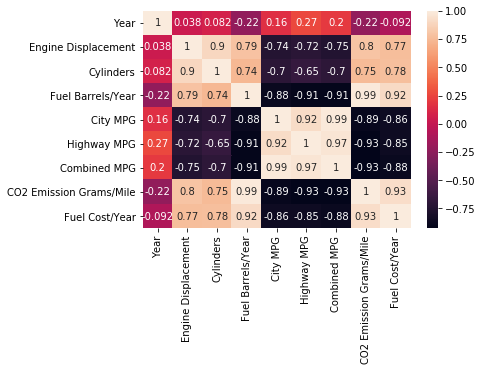

In [9]:
# Calculate correlation
sns.heatmap(vehicles.corr(), annot = True)

In [ ]:
"""
According to the correlation, I think the most immportant variable in determining CO2 emissions is 
Fuel Barrels/Year (corr is 0.99). Also Fuel Cost/Year has a high correlation (0.93). 

The least helpful information for determining CO2 emissions is year. This means that there doesn't seem to be a
relationship between the newness of the car and CO2 emissions.
"""

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
"""
I'm using a Multiple Linear Regression because we are investigating more than 2 variables.
"""

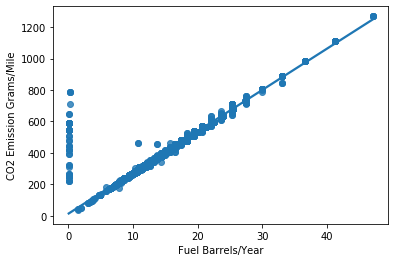

In [10]:
sns.regplot(x="Fuel Barrels/Year", y="CO2 Emission Grams/Mile", data=vehicles)

In [12]:
# Multiple linear regression
X = vehicles["Fuel Barrels/Year"]
Y = vehicles["CO2 Emission Grams/Mile"]


model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [13]:
# Your response here. 
model.summary()

## Used as a reference: https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.998
Model:                                 OLS   Adj. R-squared (uncentered):              0.998
Method:                      Least Squares   F-statistic:                          2.164e+07
Date:                     Sun, 31 May 2020   Prob (F-statistic):                        0.00
Time:                             12:32:05   Log-Likelihood:                     -1.5864e+05
No. Observations:                    35952   AIC:                                  3.173e+05
Df Residuals:                        35951   BIC:                                  3.173e+05
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fuel Barrels/Year    26.9498      0.006   4651.565      0.000      26.938      26.961
==============================================================================
Omnibus:                    89555.105   Durbin-Watson:                   0.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1022572329.320
Skew:                          27.472   Prob(JB):                         0.00
Kurtosis:                     827.382   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
"""
The coefficient of 26.95 means that as the Fuel Barrels/Year increases by 1, the predicted
value of CO2 Emissions increases by 26.95.

The Fuel Barrels/Year has statistically significant p-value; there is a 
95% confidence intervals for the Fuel Barrels/Year. This means we predict at a 
95% percent confidence that the value of Fuel Barrels/Year is between 26.938 to 26.961)

"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 